In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

In [58]:
#veri setini yükleyelim
df = pd.read_csv("winequalityred.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
#eksik değerleri gözlemleyelim
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
#240 adet yinelenmiş veri olduğu görülüyor
df.duplicated().sum()

240

In [61]:
#değişkenlerin typelarına bakalım
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [62]:
#özet istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Ortalamanın medyan değeriyle yakın olması dağılımın simetriğe yakın olabileceğini gösterir. Residual sugar ve total sulfur dioxide değişkenlerinde çarpıklık olabilir.Bundan dolayı grafiklerine bakacağız

<Axes: xlabel='residual sugar', ylabel='Density'>

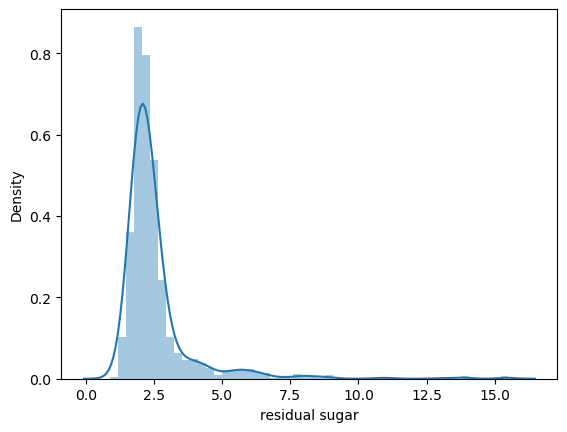

In [63]:
#Burada da görüldüğü üzere residual sugar değişkeni sağa çarpık bir dağılıma sahip.
sns.distplot(df["residual sugar"])

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

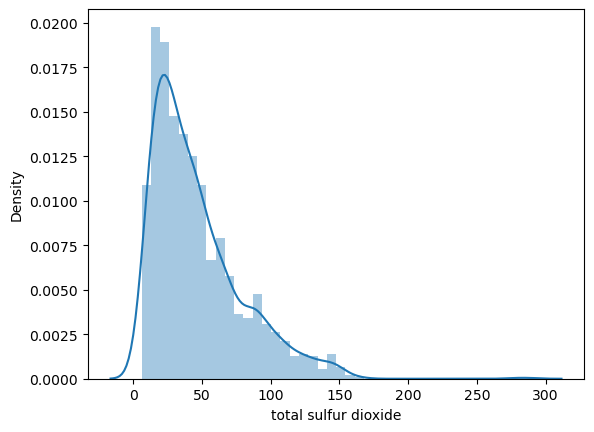

In [64]:
#Aynı şekilde total sulfur dioxide değişkeni sağa çarpık bir dağılıma sahip.
sns.distplot(df["total sulfur dioxide"])

### Yukarıdaki iki değişkenler sağa çarpık olduklarından dolayı modelleme sürecinde olumsuz etki yaratmaması için model oluşturmadan normalleştirme yapılacaktır.

### Isı haritası ile değişkenler arası korelasyon analizi yapalım.

<Axes: >

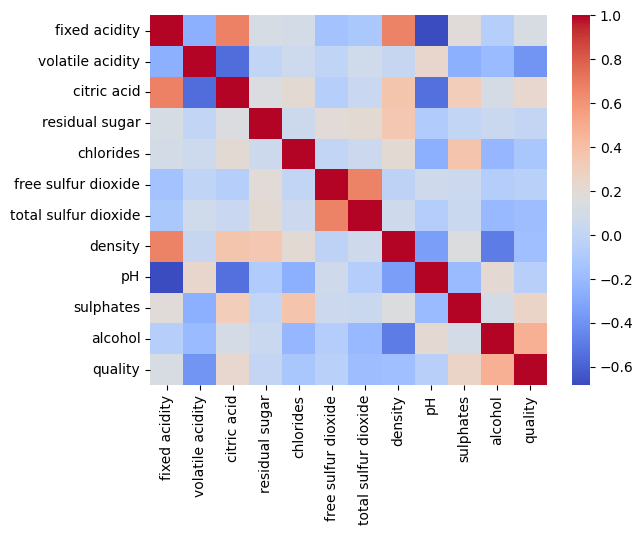

In [65]:
corr = df.corr()
sns.heatmap(corr,cmap = "coolwarm")

In [66]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Açıklayıcı değişkenlerin yanıt değişkenine olan etkilerini gözlemleyelim.

### Residual sugar değişkeninin modele doğrudan anlamlı katkı sağlamadığı görülüyor.Modelin performansını olumsuz etkilemediği takdirde değişkeni modele almayabiliriz.

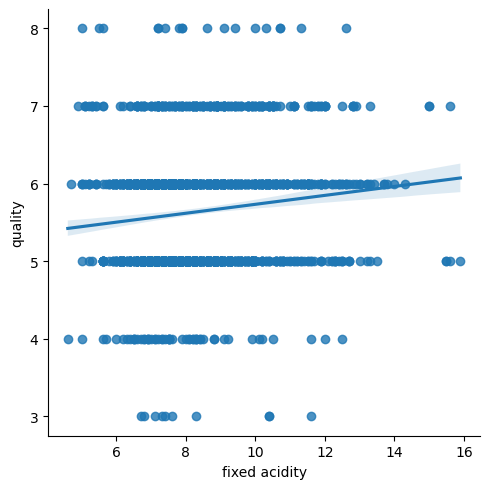

In [67]:
sns.lmplot(x = "fixed acidity", y = "quality", data = df);

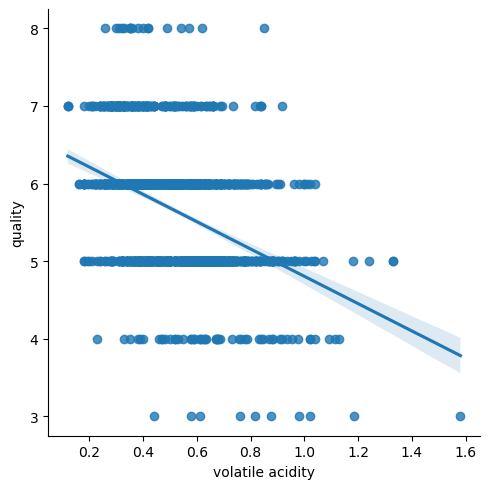

In [68]:
sns.lmplot(x = "volatile acidity", y = "quality", data = df);

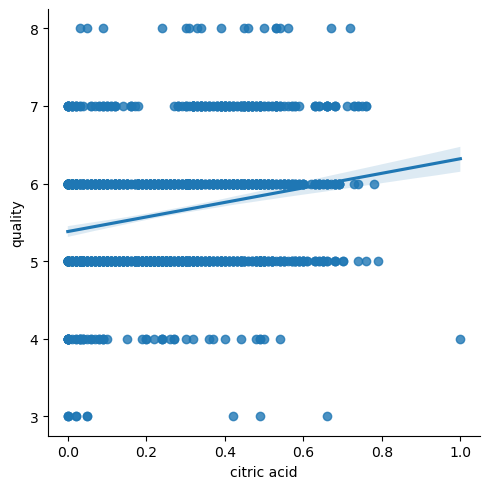

In [69]:
sns.lmplot(x = "citric acid", y = "quality", data = df);

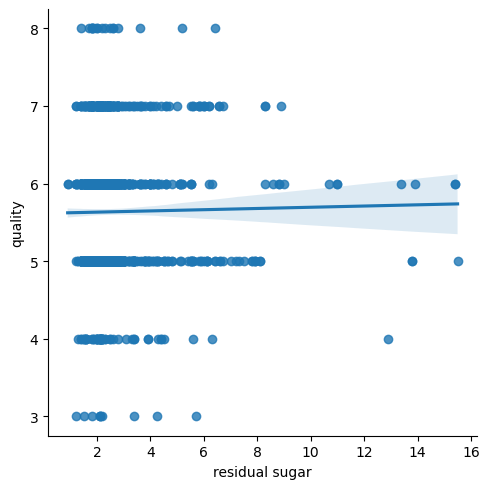

In [70]:
sns.lmplot(x = "residual sugar", y = "quality", data = df);

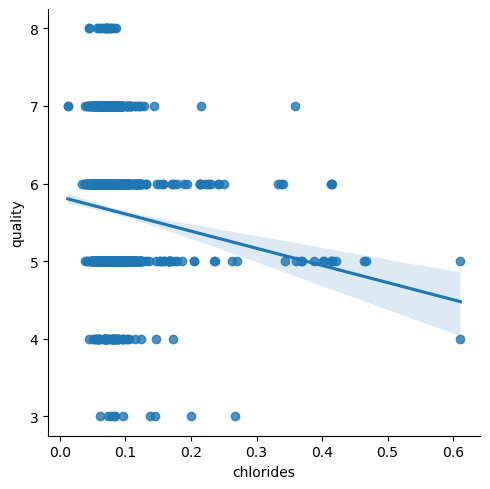

In [71]:
sns.lmplot(x = "chlorides", y = "quality", data = df);

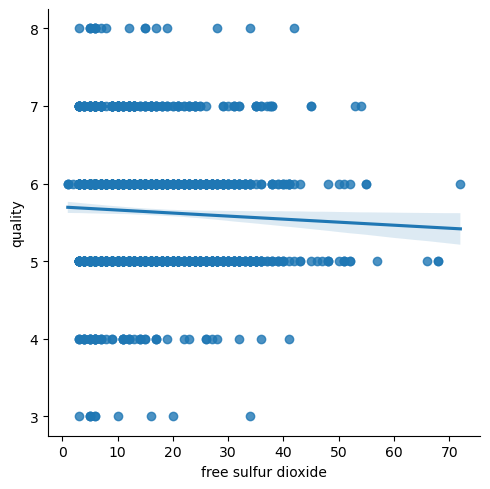

In [72]:
sns.lmplot(x = "free sulfur dioxide", y = "quality", data = df);

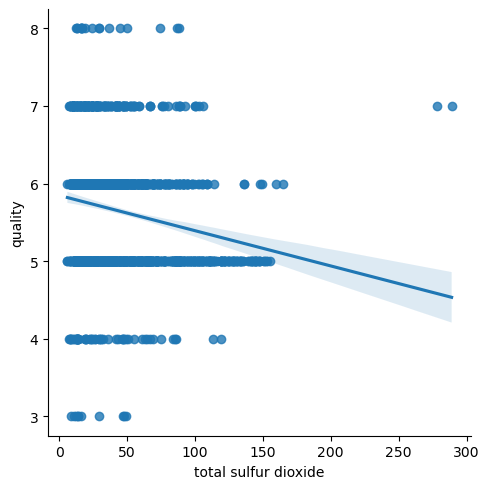

In [73]:
sns.lmplot(x = "total sulfur dioxide", y = "quality", data = df);

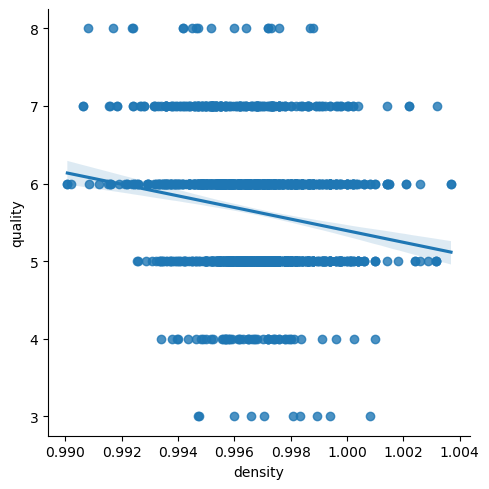

In [74]:
sns.lmplot(x = "density", y = "quality", data = df);

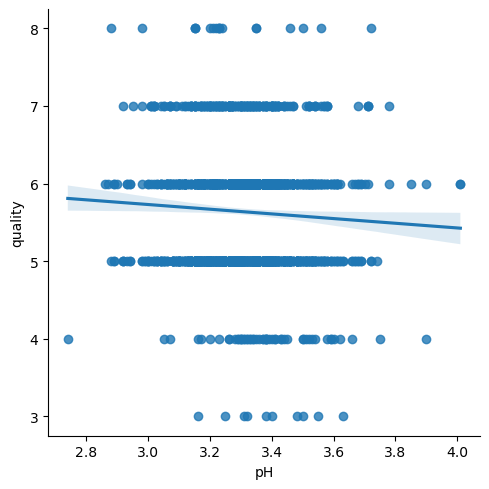

In [75]:
sns.lmplot(x = "pH", y = "quality", data = df);

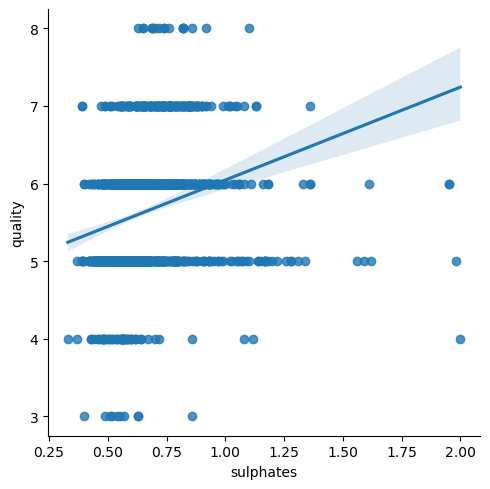

In [76]:
sns.lmplot(x = "sulphates", y = "quality", data = df);

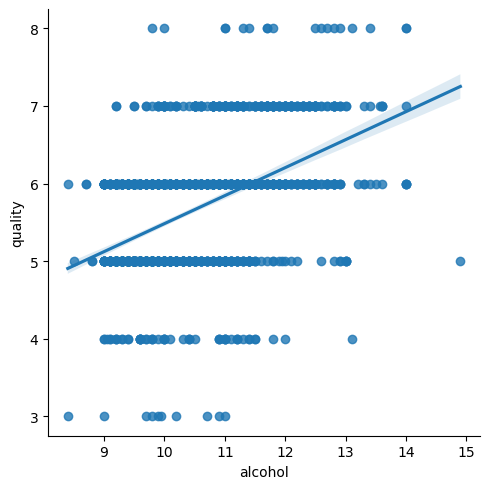

In [77]:
sns.lmplot(x = "alcohol", y = "quality", data = df);

# Modele geçmeden aykırı değerleri gözlemleyelim.

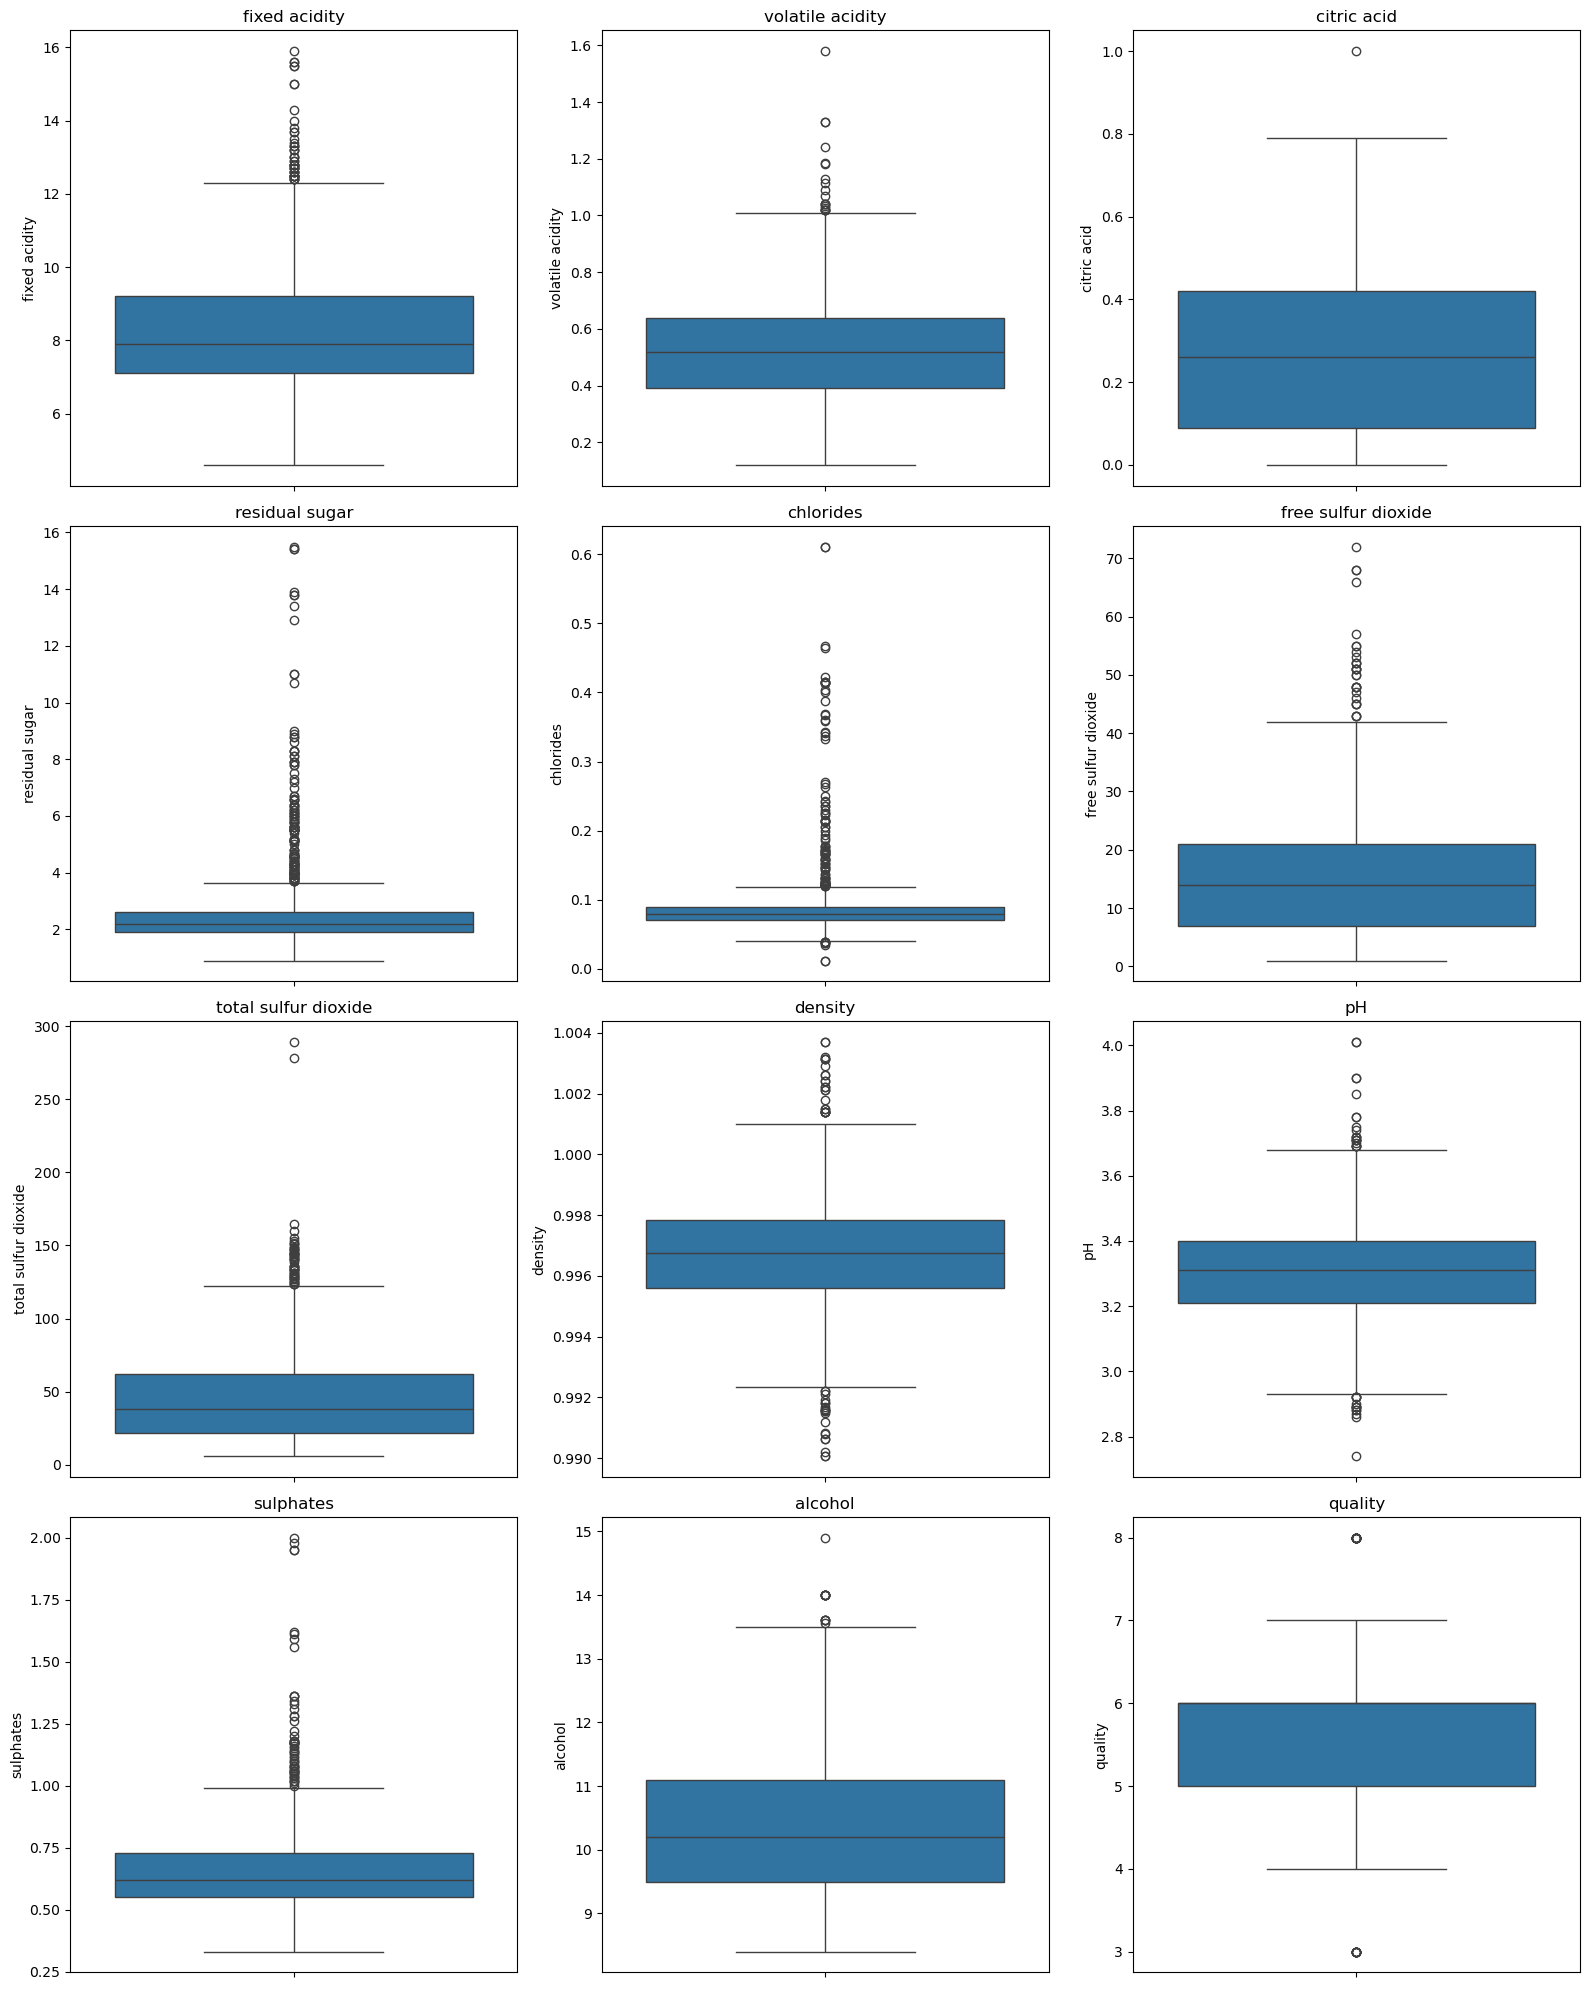

In [78]:
plt.figure(figsize=(16, 20))

for i, column in enumerate(df.columns, 1):  
    plt.subplot(4, 3, i)  
    sns.boxplot(y=df[column])
    plt.title(column)  
    plt.tight_layout()  

plt.show()


# Veri Ön İşleme

In [79]:
#quality yanıt değişkenini kategorik veriye dönüştürelim.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [80]:
from sklearn.preprocessing import OrdinalEncoder

df['quality_category'] = pd.cut(df['quality'], bins=[0, 5, 10], labels=["kötü", "iyi"], include_lowest=True)
ordinal_encoder = OrdinalEncoder(categories=[["kötü","iyi"]])
df['quality'] = ordinal_encoder.fit_transform(df[['quality_category']])

print(df[['quality', 'quality_category']].head())


   quality quality_category
0      0.0             kötü
1      0.0             kötü
2      0.0             kötü
3      1.0              iyi
4      0.0             kötü


In [81]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,kötü
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0,kötü
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0,kötü
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,iyi
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,kötü


# Model Oluşturma

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Veri bölme
X = df.drop(['quality',"quality_category","residual sugar"], axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model oluşturma ve eğitme
randommodel = RandomForestClassifier(n_estimators=100, random_state=42)
randommodel.fit(X_train, y_train)

# Tahmin ve performans değerlendirme
y_pred = randommodel.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       178
         1.0       0.82      0.84      0.83       222

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



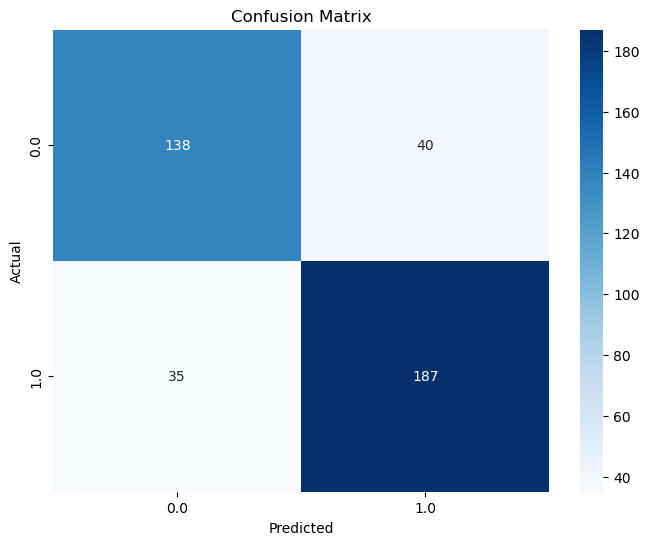

In [83]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randommodel.classes_, yticklabels=randommodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [85]:
from xgboost import XGBClassifier

# Model oluşturma ve eğitme
xgbmodel = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgbmodel.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = xgbmodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77       178
         1.0       0.81      0.83      0.82       222

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.80      0.79       400



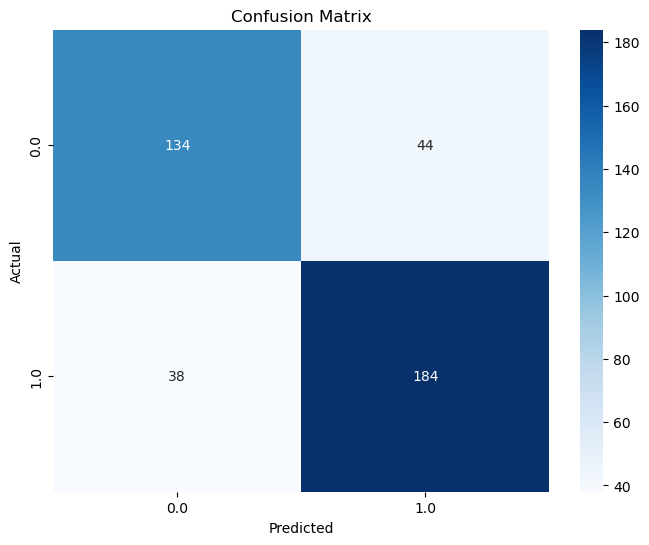

In [86]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randommodel.classes_, yticklabels=randommodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       178
         1.0       0.79      0.70      0.74       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



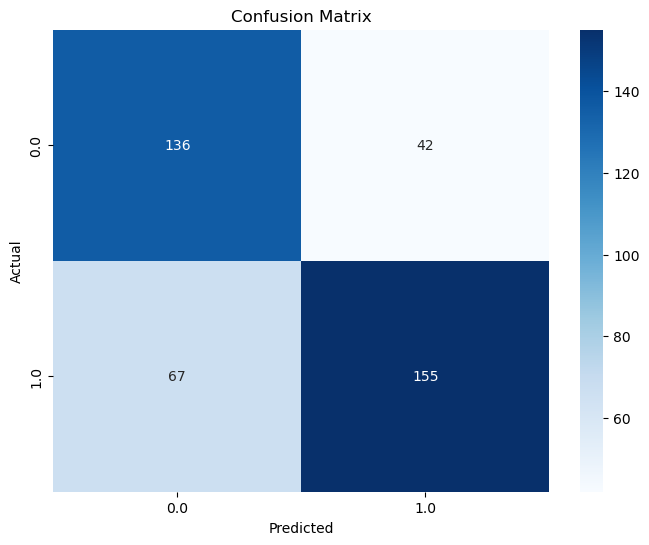

In [88]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randommodel.classes_, yticklabels=randommodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knnmodel.fit(X_train, y_train)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       178
         1.0       0.79      0.70      0.74       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



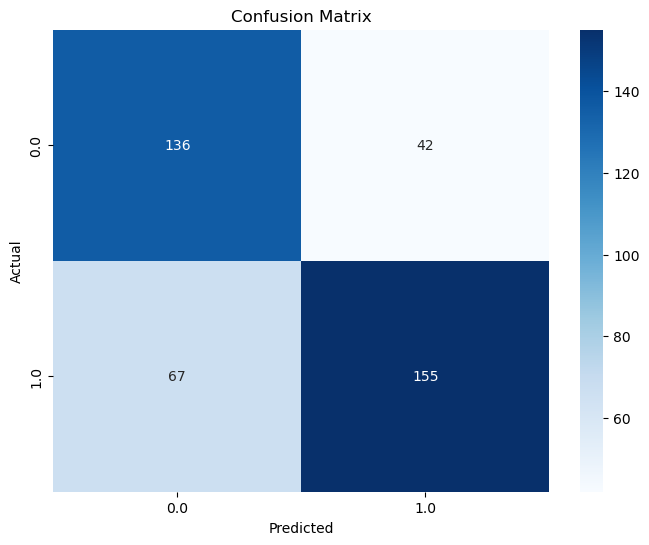

In [90]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randommodel.classes_, yticklabels=randommodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [91]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(random_state=42)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70       178
         1.0       0.77      0.74      0.75       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



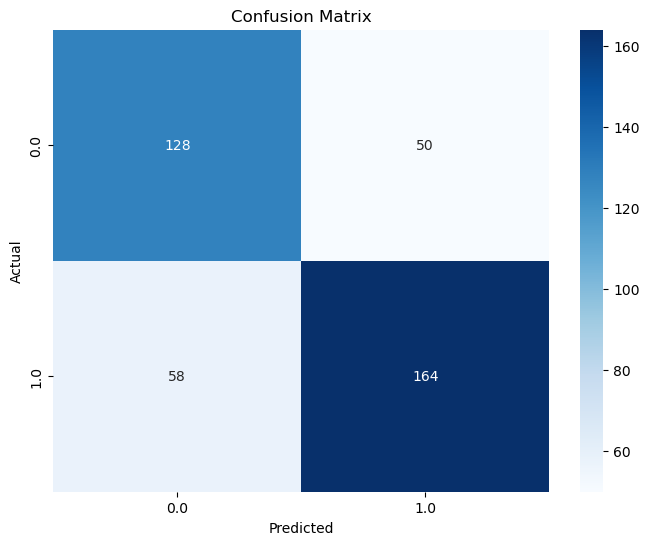

In [92]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randommodel.classes_, yticklabels=randommodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [93]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71       178
         1.0       0.77      0.75      0.76       222

    accuracy                           0.74       400
   macro avg       0.73      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



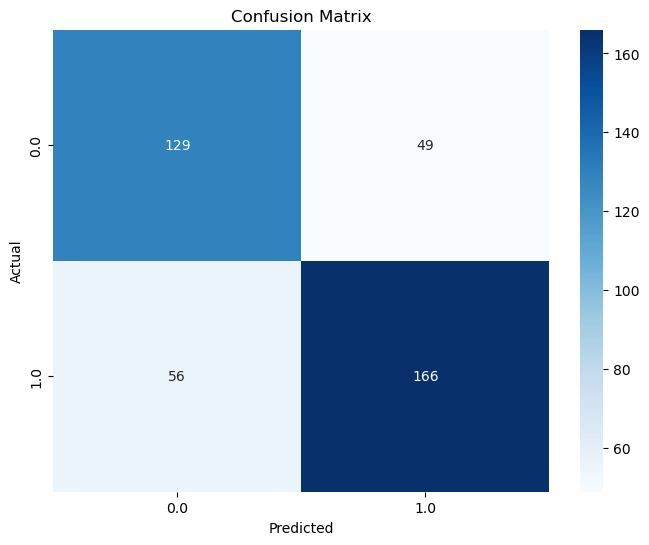

In [94]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randommodel.classes_, yticklabels=randommodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       178
         1.0       0.81      0.79      0.80       222

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



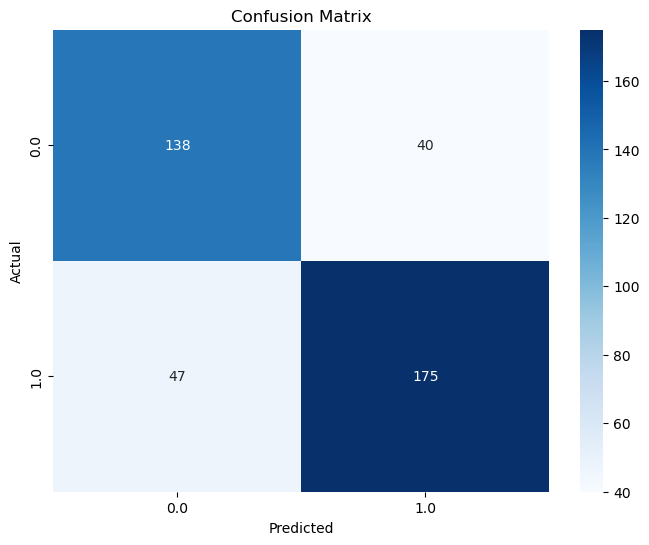

In [96]:
# Confusion Matrix Hesapla
cm = confusion_matrix(y_test, y_pred)

# Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=randommodel.classes_, yticklabels=randommodel.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random forest, XGBoost, Decision Tree, KNN, Lojistik Regresyon, GBM, SVC modelleri oluşturduk.Accuracy,f1,precision ve recall değerlerinin en tutarlı olduğu model random forest olduğu gözlemleniyor.Tahmin yaparken random forest modeli kullanacağız.

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report


# Kullanılacak modeller
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Classifier (SVC)": SVC(probability=True, random_state=42),
    "GBM": GradientBoostingClassifier(random_state=42)
}

# Başarı metriklerini saklamak için bir DataFrame
results = []

# Modelleri eğitme ve değerlendirme
for name, model in models.items():
    # Model eğitimi
    model.fit(X_train, y_train)
    
    # Tahminler
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrikler
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # Sonuçları saklama
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Sonuçları bir DataFrame'e çevirip sıralama
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)

# En iyi modelin raporunu görüntüleme
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
print(f"\n{best_model_name} için Classification Report:\n")
print(classification_report(y_test, y_pred))


                             Model  Accuracy  F1 Score   ROC AUC
0                    Random Forest    0.8125  0.832962  0.890158
1                          XGBoost    0.7950  0.817778  0.879669
6                              GBM    0.7825  0.800915  0.856590
3                    Decision Tree    0.7400  0.763636  0.737929
4              Logistic Regression    0.7300  0.748837  0.797474
5  Support Vector Classifier (SVC)    0.6375  0.723810  0.694390
2              K-Nearest Neighbors    0.6175  0.648276  0.671905

Random Forest için Classification Report:

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       178
         1.0       0.82      0.84      0.83       222

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



### En iyi tahmin yapan modelimiz random forest olduğu görülüyor tahminlerimizi random forest kullanarak yapacağız.

In [98]:
new_data = pd.DataFrame([{
    "fixed acidity": 6.2,
    "volatile acidity": 0.66,
    "citric acid": 0.03,
    "chlorides": 0.029,
    "free sulfur dioxide": 25.0,
    "total sulfur dioxide": 75.0,
    "density": 0.9892,
    "pH": 3.33,
    "sulphates": 0.39,
    "alcohol": 12.8,
    
}])


tahmin = randommodel.predict(new_data)


if tahmin == 0:
  print("Tahmin Edilen Kalite: Kötü")
else:
  print("Tahmin Edilen Kalite: İyi")


Tahmin Edilen Kalite: İyi


# Kavaklıdere Angora Kırmızı

In [99]:
new_data = pd.DataFrame([{
    "fixed acidity": 6.1,
    "volatile acidity": 0.47,
    "citric acid": 0.3,
    "chlorides": 0.05,
    "free sulfur dioxide": 25.0,
    "total sulfur dioxide": 100.0,
    "density": 1.0,
    "pH": 3.3,
    "sulphates": 0.5,
    "alcohol": 13,
    
}])


tahmin = randommodel.predict(new_data)


if tahmin == 0:
  print("Tahmin Edilen Kalite: Kötü")
else:
  print("Tahmin Edilen Kalite: İyi")

Tahmin Edilen Kalite: İyi


# Kavaklıdere Yakut

In [100]:
new_data = pd.DataFrame([{
    "fixed acidity": 6.5,
    "volatile acidity": 0.4,
    "citric acid": 0.3,
    "chlorides": 0.06,
    "free sulfur dioxide": 35.0,
    "total sulfur dioxide": 120.0,
    "density": 1.0,
    "pH": 3.3,
    "sulphates": 0.5,
    "alcohol": 13,
    
}])


tahmin = randommodel.predict(new_data)


if tahmin == 0:
  print("Tahmin Edilen Kalite: Kötü")
else:
  print("Tahmin Edilen Kalite: İyi")

Tahmin Edilen Kalite: Kötü


# Doluca Kav

In [101]:
new_data = pd.DataFrame([{
    "fixed acidity": 6.5,
    "volatile acidity": 0.5,
    "citric acid": 0.3,
    "chlorides": 0.06,
    "free sulfur dioxide": 33.0,
    "total sulfur dioxide": 100.0,
    "density": 1.0,
    "pH": 3.3,
    "sulphates": 0.5,
    "alcohol": 13,
    
}])


tahmin = randommodel.predict(new_data)


if tahmin == 0:
  print("Tahmin Edilen Kalite: Kötü")
else:
  print("Tahmin Edilen Kalite: İyi")

Tahmin Edilen Kalite: İyi
